In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer



In [3]:
%%time
train = pd.read_csv("data/ohe_train_recipes_v2.csv",index_col="id")

CPU times: user 10 s, sys: 1.21 s, total: 11.2 s
Wall time: 11.7 s


In [4]:
train.sample(3)[['cuisine']+np.random.choice(train.columns.tolist(),size=7).tolist()]

,cuisine,gluten-free pie crust,olive oil,light soy sauce,Progresso Balsamic Vinegar,rice powder,green chilies,instant butterscotch pudding mix
id,,,,,,,,
17586,mexican,0,0,0,0,0,0,0
33734,mexican,0,0,0,0,0,0,0
501,irish,0,0,0,0,0,0,0


In [5]:
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['cuisine']), 
                                                    train['cuisine'], 
                                                    test_size=0.33, random_state=42,
                                                    stratify=train['cuisine'])

In [6]:
# check stratification
(y_train.value_counts() / y_train.size).to_frame().merge(y_val.value_counts() / y_val.size, left_index=True, right_index=True, suffixes=("_train","_val")).head(5)

,cuisine_train,cuisine_val
italian,0.197050,0.197090
mexican,0.161851,0.161892
southern_us,0.108601,0.108639
indian,0.075503,0.075499
chinese,0.067210,0.067195


In [7]:
X_train

,1% buttermilk,1% chocolate milk,1% cottage cheese,1% milk,"2 1/2 to 3 lb. chicken, cut into serving pieces",2% cottage cheese,2% low fat cheddar chees,2% lowfat greek yogurt,2% milk mozzarella cheese,2% reduced-fat milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
26541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tfidf = TfidfTransformer()
tfidf.fit(X_train)
X_train_tfidf= pd.DataFrame(data=tfidf.transform(X_train).toarray(),
                 index=X_train.index, columns=X_train.columns)
X_val_tfidf= pd.DataFrame(data=tfidf.transform(X_val).toarray(),
                 index=X_val.index, columns=X_val.columns)

In [9]:
n = 100 #Number of components
pca = PCA(n_components = n)
pca.fit(X_train)
X_train_pca = pd.DataFrame(data=pca.transform(X_train), index=X_train.index, columns=["PC"+str(i) for i in range(1,n+1)])
X_val_pca   = pd.DataFrame(data=pca.transform(X_val),   index=X_val.index,   columns=["PC"+str(i) for i in range(1,n+1)])

In [10]:
X_train.shape, X_train_tfidf.shape, X_train_pca.shape

((26648, 6215), (26648, 6215), (26648, 100))

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [60]:
X_train.loc[np.random.choice(X_train.index, size=5),:]

,1% buttermilk,1% chocolate milk,1% cottage cheese,1% milk,"2 1/2 to 3 lb. chicken, cut into serving pieces",2% cottage cheese,2% low fat cheddar chees,2% lowfat greek yogurt,2% milk mozzarella cheese,2% reduced-fat milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
23902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
def get_sample(x,y,n):
    idx = np.random.choice(X_train.index, size=n)
    return x.loc[idx,:], y[idx]

In [64]:
sample_sizes = [50,100,500,1000,5000,10000]
for s in sample_sizes:
    x,y = get_sample(X_train, y_train, s)
    lr=LogisticRegression()
    lr.fit(x,y)
    print("Size {}: \n   Train Acc: {:.4f} Val Acc: {:.4f}".format(s,lr.score(X_val,y_val), lr.score(X_train,y_train)))

Size 50: 
   Train Acc: 0.3026 Val Acc: 0.3091
Size 100: 
   Train Acc: 0.4136 Val Acc: 0.4226
Size 500: 
   Train Acc: 0.5608 Val Acc: 0.5694
Size 1000: 
   Train Acc: 0.6022 Val Acc: 0.6172


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Size 5000: 
   Train Acc: 0.7056 Val Acc: 0.7494


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Size 10000: 
   Train Acc: 0.7276 Val Acc: 0.7942


In [18]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
lr.score(X_val,y_val), lr.score(X_train,y_train)

(0.7728173091573975, 0.8926748724106874)

Looks to be overfit, can we use regularization? 

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {'C':[0.05,0.1,0.5,1,2]}
lr=LogisticRegression()

In [23]:
clf = GridSearchCV(lr, parameters,cv=3,verbose=2)

In [24]:
clf.fit(X_val, y_val)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 0.5, 1, 2]})

In [26]:
clf.best_score_, clf.best_params_

(0.7392968921389397, {'C': 1})

In [74]:
lr=LogisticRegression()
lr.fit(X_train_tfidf,y_train)
lr.score(X_train_tfidf,y_train), lr.score(X_val_tfidf,y_val)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8318072650855599, 0.7702270303214993)

In [76]:
lr=LogisticRegression()
lr.fit(X_train_pca,y_train)
lr.score(X_train_pca,y_train), lr.score(X_val_pca,y_val)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6654908435905134, 0.6532835593478592)

### Discriminant Analysis

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [66]:
%%time
qda_model = QDA()
qda_model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [67]:
qda_model.predict(X_train)

array(['mexican', 'italian', 'mexican', ..., 'russian', 'british',
       'italian'], dtype=object)

In [70]:
%%time
qda_model.score(X_train, y_train), qda_model.score(X_val, y_val)

(0.5025142599819874, 0.3646198384884961)

In [71]:
%%time
lda_model = LDA()
lda_model.fit(X_train, y_train)

CPU times: user 13min 24s, sys: 12.6 s, total: 13min 37s
Wall time: 2min 16s


LinearDiscriminantAnalysis()

In [72]:
%%time
lda_model.score(X_train, y_train), lda_model.score(X_val, y_val)

CPU times: user 5.34 s, sys: 1.95 s, total: 7.29 s
Wall time: 1.6 s


(0.847530771540078, 0.727868352887399)

In [73]:
%%time
lda_model_tfidf = LDA()
lda_model_tfidf.fit(X_train_tfidf, y_train)
lda_model_tfidf.score(X_train_tfidf, y_train), lda_model_tfidf.score(X_val_tfidf, y_val)

CPU times: user 14min 5s, sys: 14.6 s, total: 14min 20s
Wall time: 2min 23s


(0.8560867607325128, 0.7376961755294835)

In [ ]:
%%time
lda_model_pca = LDA()
lda_model_pca.fit(X_train_pca, y_train)
lda_model_pca.score(X_train_pca, y_train), lda_model_pca.score(X_val_pca, y_val)

### Decision Trees & Random Forests

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
%%time 
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)
tree_model.score(X_train, y_train), tree_model.score(X_val, y_val)

(0.9997373161212849, 0.6117629133018436)

In [81]:
%%time
forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(X_train, y_train)
forest_model.score(X_train, y_train), forest_model.score(X_val, y_val)

CPU times: user 37.6 s, sys: 477 ms, total: 38.1 s
Wall time: 38.1 s


(0.9997373161212849, 0.7199451470364163)

In [83]:
tree_model.tree_.max_depth

321

In [84]:
%%time 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=200)
tree_model.fit(X_train, y_train)
tree_model.score(X_train, y_train), tree_model.score(X_val, y_val)

CPU times: user 9.39 s, sys: 233 ms, total: 9.62 s
Wall time: 9.67 s


(0.9919693785649955, 0.6080298643912845)

In [85]:
%%time
forest_model = RandomForestClassifier(random_state=0, max_depth=100, n_estimators=50)
forest_model.fit(X_train, y_train)
forest_model.score(X_train, y_train), forest_model.score(X_val, y_val)

CPU times: user 16.4 s, sys: 388 ms, total: 16.8 s
Wall time: 16.8 s


(0.9768838186730712, 0.707907968916654)

In [88]:
%%time
forest_model = RandomForestClassifier(random_state=0, max_depth=50)
forest_model.fit(X_train_tfidf, y_train)
forest_model.score(X_train_tfidf, y_train), forest_model.score(X_val_tfidf, y_val)

CPU times: user 26.6 s, sys: 423 ms, total: 27 s
Wall time: 27 s


(0.8535725007505254, 0.657702270303215)

In [89]:
%%time
forest_model = RandomForestClassifier(random_state=0, max_depth=100)
forest_model.fit(X_train_pca, y_train)
forest_model.score(X_train_pca, y_train), forest_model.score(X_val_pca, y_val)

CPU times: user 23.8 s, sys: 125 ms, total: 23.9 s
Wall time: 23.9 s


(0.9997373161212849, 0.6014779826298948)

In [90]:
%%time
forest_model = RandomForestClassifier(random_state=0, max_depth=50)
forest_model.fit(X_train_pca, y_train)
forest_model.score(X_train_pca, y_train), forest_model.score(X_val_pca, y_val)

CPU times: user 23.8 s, sys: 92.3 ms, total: 23.9 s
Wall time: 23.9 s


(0.9997373161212849, 0.6014779826298948)

### XGBoost

In [93]:
# import xgboost as xgb

In [96]:
# %%time
# xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

# xgb_model.fit(X_train, y_train)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:44:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [97]:
# xgb_model.score(X_train, y_train), xgb_model.score(X_val, y_val)

NotFittedError: need to call fit or load_model beforehand

### SVM

In [98]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
# %%time
# svc_model = SVC()
# svc_model.fit(X_train, y_train)
# svc_model.score(X_train, y_train), svc_model.score(X_val, y_val)


### Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
nn_model = KNeighborsClassifier(n_neighbors=5)

In [13]:
nn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
%%time
nn_model.score(X_train, y_train), nn_model.score(X_val, y_val)

CPU times: user 7min 7s, sys: 19.5 s, total: 7min 26s
Wall time: 1min 15s


(0.6955118583008105, 0.5476916044491849)

In [23]:
nn_model_pca = KNeighborsClassifier(n_neighbors=7)
nn_model_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
%%time
nn_model_pca.score(X_train_pca, y_train), nn_model_pca.score(X_val_pca, y_val)

CPU times: user 8.04 s, sys: 454 ms, total: 8.49 s
Wall time: 1.42 s


(0.649241969378565, 0.53504494895627)

In [25]:
nn_model_tfidf = KNeighborsClassifier(n_neighbors=7)
nn_model_tfidf.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
%%time
nn_model_tfidf.score(X_train_tfidf, y_train), nn_model_tfidf.score(X_val_tfidf, y_val)

CPU times: user 5min 58s, sys: 1.9 s, total: 6min
Wall time: 52.9 s


(0.8031371960372261, 0.7285540149321956)

In [27]:
nn_model_tfidf = KNeighborsClassifier(n_neighbors=9)
nn_model_tfidf.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=9)

In [28]:
%%time
nn_model_tfidf.score(X_train_tfidf, y_train), nn_model_tfidf.score(X_val_tfidf, y_val)

CPU times: user 5min 57s, sys: 1.79 s, total: 5min 59s
Wall time: 53 s


(0.794993995797058, 0.7390674996190767)

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[1,3,5,7,9,11,13,15,17]},verbose=2,cv=3)

In [53]:
X_tfidf_sample, y_sample = get_sample(X_train_tfidf, y_train, 500)

In [54]:
grid_search.fit(X_tfidf_sample, y_sample)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=7; total time=   0.1s
[CV] END ......................................n_neighbors=7; total time=   0.1s
[CV] END ......................................n_

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17]},
             verbose=2)

In [55]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [56]:
nn_model_tfidf = KNeighborsClassifier(n_neighbors=11)
nn_model_tfidf.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=11)

In [57]:
%%time
nn_model_tfidf.score(X_train_tfidf, y_train), nn_model_tfidf.score(X_val_tfidf, y_val)

CPU times: user 5min 57s, sys: 2.22 s, total: 5min 59s
Wall time: 53.9 s


(0.7883143200240168, 0.7410483010818223)

## Old Code using Subset of Data

This is kept for inspiration at the moment 

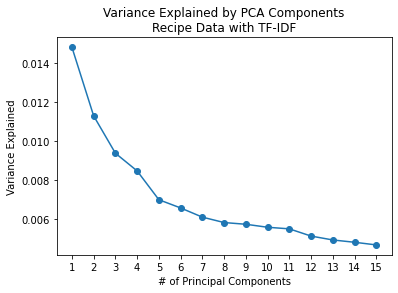

In [257]:
n = 15
plt.plot(range(1,n+1,1),pca.explained_variance_[0:n], marker="o");
plt.xticks(list(range(1,n+1,1)));
plt.xlabel("# of Principal Components");
plt.ylabel("Variance Explained");
plt.title("Variance Explained by PCA Components\nRecipe Data with TF-IDF");

In [150]:
def model_train_val_scores(model, train_x, train_y, val_x, val_y):
    model.fit(train_x, train_y)
    return model.score(train_x, train_y), model.score(val_x, val_y)

def model_acc_by_components(model, train_x, train_y, val_x, val_y, components):
    train_accs = []
    val_accs   = []
    for c in components: 
        train_acc, val_acc = model_train_val_scores(model, train_x[:,0:c], train_y, val_x[:,0:c], val_y)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
    return components, train_accs, val_accs

In [159]:
pcs = range(10,101,5)
list(pcs)

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

In [166]:
import warnings
warnings.filterwarnings('ignore', 'Variables are collinear')

In [171]:
pcs = range(2,70,2)
components, train_accs, val_accs = model_acc_by_components(QDA(), 
                                                           reduced_tfidf_train, y_train, 
                                                           reduced_tfidf_val, y_val, 
                                                           pcs)


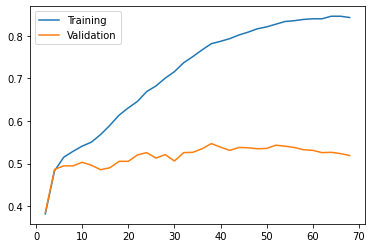

In [172]:
plt.plot(components, train_accs, label="Training")
plt.plot(components, val_accs, label="Validation");
plt.legend();

In [175]:
L_pcs = range(10,300,10)
L_components, L_train_accs, L_val_accs = model_acc_by_components(LDA(), 
                                                           reduced_tfidf_train, y_train, 
                                                           reduced_tfidf_val, y_val, 
                                                           L_pcs)


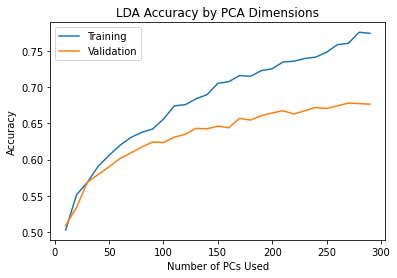

In [260]:
plt.plot(L_components, L_train_accs, label="Training")
plt.plot(L_components, L_val_accs, label="Validation");
plt.legend();
plt.xlabel("Number of PCs Used")
plt.ylabel("Accuracy")
plt.title("LDA Accuracy by PCA Dimensions");

In [185]:
dict(zip(Lmodel.classes_, Lmodel.priors_))['italian']


0.1958955223880597

Comparison with a simple SVM 

In [186]:
from sklearn.svm import SVC

In [187]:
clf = SVC()

In [189]:
clf.fit(train_tfidf, y_train)

SVC()

In [190]:
clf.predict(val_tfidf)

array(['italian', 'italian', 'chinese', ..., 'italian', 'greek',
       'italian'], dtype=object)

In [191]:
clf.score(train_tfidf, y_train)

0.951865671641791

In [192]:
clf.score(val_tfidf, y_val)

0.6333333333333333

In [193]:
SVM_pcs = range(2,10,1)
SVM_components, SVM_train_accs, SVM_val_accs = model_acc_by_components(SVC(), 
                                                           reduced_tfidf_train, y_train, 
                                                           reduced_tfidf_val, y_val, 
                                                           SVM_pcs)

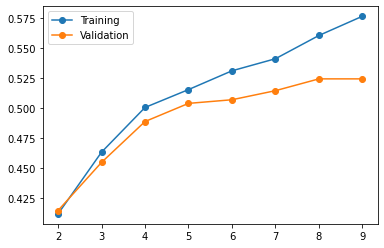

In [196]:
plt.plot(SVM_components, SVM_train_accs, label="Training",marker="o")
plt.plot(SVM_components, SVM_val_accs, label="Validation",marker="o");
plt.xticks(SVM_components);
plt.legend();

In [197]:
SVM_pcs = range(1,25,2)
SVM_components, SVM_train_accs, SVM_val_accs = model_acc_by_components(SVC(), 
                                                           reduced_tfidf_train, y_train, 
                                                           reduced_tfidf_val, y_val, 
                                                           SVM_pcs)

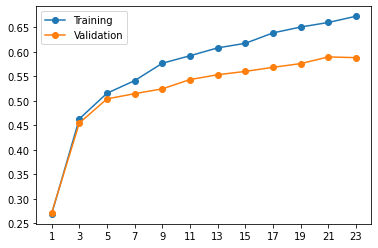

In [198]:
plt.plot(SVM_components, SVM_train_accs, label="Training",marker="o")
plt.plot(SVM_components, SVM_val_accs, label="Validation",marker="o");
plt.xticks(SVM_components);
plt.legend();

In [202]:
SVM_val_accs[np.argmax(SVM_val_accs)]

0.5893939393939394

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
clf = LogisticRegression(random_state=0)


In [205]:
clf.fit(train_tfidf, y_train)

LogisticRegression(random_state=0)

In [208]:
clf.score(train_tfidf, y_train),clf.score(val_tfidf, y_val)

(0.7910447761194029, 0.6522727272727272)

In [216]:
log_pcs = range(5,201,10)
log_components, log_train_accs, log_val_accs = model_acc_by_components(LogisticRegression(), 
                                                           reduced_tfidf_train, y_train, 
                                                           reduced_tfidf_val, y_val, 
                                                           log_pcs)

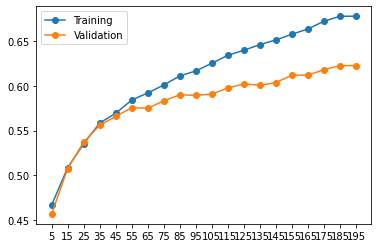

In [217]:
plt.plot(log_components, log_train_accs, label="Training",marker="o")
plt.plot(log_components, log_val_accs, label="Validation",marker="o");
plt.xticks(log_components);
plt.legend();

In [219]:
log_val_accs[np.argmax(log_val_accs)]

0.6227272727272727

In [228]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [235]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=50, random_state=2)

In [236]:
clf.fit(train_tfidf, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   random_state=2)

In [237]:
clf.score(train_tfidf, y_train),clf.score(val_tfidf, y_val)

(0.7705223880597015, 0.4643939393939394)

In [241]:
clf = AdaBoostClassifier(base_estimator=SVC(), n_estimators=50, random_state=2,algorithm='SAMME')

In [243]:
clf.fit(train_tfidf, y_train)

In [ ]:
clf.score(train_tfidf, y_train),clf.score(val_tfidf, y_val)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), random_state=2)

## Explore Model Failures

In [262]:
clf = LogisticRegression(random_state=0)

In [263]:
clf.fit(train_tfidf, y_train)

LogisticRegression(random_state=0)

In [264]:
clf.score(train_tfidf, y_train),clf.score(val_tfidf, y_val)

(0.7910447761194029, 0.6522727272727272)

In [304]:
log_preds = pd.Series(data=clf.predict(val_tfidf),index=val_tfidf.index)

In [354]:
log_preds == y_val

id
45834    False
4569     False
5611     False
2055      True
46354    False
         ...  
35940    False
31207     True
27177     True
44257     True
13012    False
Length: 1320, dtype: bool

In [357]:
set(y_val.index)  == set(val_tfidf.index)

True

In [358]:
log_wrong_preds = log_preds[log_preds != y_val]
log_true_vals   = y_val[log_preds != y_val]

In [359]:
log_wrong_preds

id
45834        italian
4569         italian
5611         chinese
46354    southern_us
24074         french
            ...     
6541          french
29619        italian
18354    southern_us
35940    southern_us
13012        italian
Length: 459, dtype: object

In [360]:
log_true_vals

id
45834    southern_us
4569           irish
5611          korean
46354        british
24074       japanese
            ...     
6541           irish
29619        mexican
18354          irish
35940      brazilian
13012       moroccan
Name: cuisine, Length: 459, dtype: object

In [284]:
(log_true_vals.value_counts()/y_val.value_counts()).fillna(0).sort_values(ascending=False)

brazilian       1.000000
spanish         0.947368
russian         0.944444
british         0.939394
irish           0.923077
vietnamese      0.923077
filipino        0.769231
moroccan        0.689655
jamaican        0.687500
korean          0.645161
greek           0.608696
french          0.580247
japanese        0.550000
thai            0.489362
cajun_creole    0.387755
southern_us     0.216783
chinese         0.160920
indian          0.152174
mexican         0.126126
italian         0.069767
Name: cuisine, dtype: float64

In [376]:
log_true_vals.name = "Actual"
log_true_vals.sort_index()
wrong_predictions = log_wrong_preds.sort_index().to_frame(name="Predicted").merge(log_true_vals.sort_index(), left_index=True, right_index=True)

In [375]:
wrong_predictions.pivot_table(index="Predicted",columns="Actual",aggfunc=len, fill_value=0)

Actual,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
Predicted,,,,,,,,,,,,,,,,,,,,
british,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
cajun_creole,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0
chinese,0,0,0,0,2,1,0,0,1,1,0,9,14,0,0,0,0,0,8,6
french,0,2,2,1,0,0,1,0,5,5,0,2,0,3,0,4,3,3,0,0
greek,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,1,0,0,0,0,0,0,2,1,0,3,6,0,1,0,3,0
italian,3,9,4,8,7,38,21,5,4,0,2,4,0,15,9,8,20,21,2,3
japanese,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0
korean,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


In [380]:
misclassified_recipes = wrong_predictions.merge(train,left_index=True, right_index=True)


In [384]:
brit = misclassified_recipes.query("Predicted == 'british'")
brit

,Predicted,Actual,1% cottage cheese,1% milk,2% reduced-fat milk,33% less sodium ham,Alfredo sauce,Amaretti Cookies,American cheese,Anaheim chile,...,yolk,yucca,yukon gold,yukon gold potatoes,yuzu,zest,zesty italian dressing,ziti,zucchini,cuisine
id,,,,,,,,,,,,,,,,,,,,,
14903,british,spanish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spanish


In [395]:
brit.loc[:,brit.any()] #this is reasonable, not much to go on here 

,Predicted,Actual,eggs,milk,onions,potatoes,salad,salt,sunflower oil,cuisine
id,,,,,,,,,,
14903,british,spanish,1,1,1,1,1,1,1,spanish


In [394]:
train['cuisine'].value_counts().head(10)

italian         783
mexican         672
southern_us     434
indian          278
chinese         265
french          246
cajun_creole    147
thai            142
greek           138
japanese        122
Name: cuisine, dtype: int64

In [393]:
log_true_vals.value_counts()

french          47
spanish         36
british         31
southern_us     31
greek           28
mexican         28
irish           24
vietnamese      24
thai            23
japanese        22
korean          20
moroccan        20
filipino        20
cajun_creole    19
italian         18
russian         17
indian          14
chinese         14
brazilian       12
jamaican        11
Name: Actual, dtype: int64

## Neural Net

In [433]:
from sklearn.neural_network import MLPClassifier


clf2 = MLPClassifier (solver = 'sgd', alpha=0.001, 
                      hidden_layer_sizes=(100,100,100), random_state=10, activation='logistic' );
classMLP = clf2.fit(train_tfidf, y_train)



In [440]:
pd.Series(classMLP.predict(val_tfidf)).value_counts()

italian    1320
dtype: int64

In [434]:
classMLP.score(val_tfidf,y_val),classMLP.score(train_tfidf,y_train)

(0.19545454545454546, 0.1958955223880597)

In [427]:
classMLP.score(val_tfidf,y_val),classMLP.score(train_tfidf,y_train)

(0.19545454545454546, 0.1958955223880597)

In [426]:
clf2.score(val_tfidf,y_val),clf2.score(train_tfidf,y_train)

(0.19545454545454546, 0.1958955223880597)

In [412]:
clf2

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=50,
              random_state=1, solver='sgd')

In [431]:
y_train.value_counts() / y_train.size , y_val.value_counts() / y_val.size

(italian         0.195896
 mexican         0.167910
 southern_us     0.108582
 indian          0.069403
 chinese         0.066418
 french          0.061567
 cajun_creole    0.036567
 thai            0.035448
 greek           0.034328
 japanese        0.030597
 spanish         0.028358
 british         0.024627
 korean          0.023507
 moroccan        0.021642
 irish           0.020149
 vietnamese      0.019776
 filipino        0.019403
 russian         0.014179
 jamaican        0.012313
 brazilian       0.009328
 Name: cuisine, dtype: float64,
 italian         0.195455
 mexican         0.168182
 southern_us     0.108333
 indian          0.069697
 chinese         0.065909
 french          0.061364
 cajun_creole    0.037121
 thai            0.035606
 greek           0.034848
 japanese        0.030303
 spanish         0.028788
 british         0.025000
 korean          0.023485
 moroccan        0.021970
 irish           0.019697
 vietnamese      0.019697
 filipino        0.019697
 russi

In [444]:
y_train.value_counts()

italian         525
mexican         450
southern_us     291
indian          186
chinese         178
french          165
cajun_creole     98
thai             95
greek            92
japanese         82
spanish          76
british          66
korean           63
moroccan         58
irish            54
vietnamese       53
filipino         52
russian          38
jamaican         33
brazilian        25
Name: cuisine, dtype: int64

In [448]:
y_train.head().sample(n=6,replace=True)

id
1870        thai
34612     french
34612     french
28993    chinese
34612     french
34612     french
Name: cuisine, dtype: object

In [475]:
def bootstrap_recipe_data(n, values, labels):
    """Will return a dataframe with n entries for each class in df
    
    Requies label be a series/df with columns 'cuisine' and the same index as `values` """
    combined_data = values.merge(labels,left_index=True,right_index=True)
    bootstrapped_data = combined_data.groupby("cuisine").apply(lambda x : x.sample(n=n, replace=True))
    return bootstrapped_data.droplevel('cuisine')

In [476]:
bootstrapped_train_data = bootstrap_recipe_data(100, train_tfidf, y_train)
bootstrapped_val_data   = bootstrap_recipe_data(100, val_tfidf, y_val)

In [481]:
bootstrapped_val_data.reset_index().groupby('cuisine').nunique()['id']

cuisine
brazilian       12
british         32
cajun_creole    46
chinese         56
filipino        25
french          58
greek           39
indian          60
irish           26
italian         84
jamaican        16
japanese        37
korean          30
mexican         76
moroccan        29
russian         18
southern_us     71
spanish         36
thai            43
vietnamese      24
Name: id, dtype: int64

In [482]:
train['cuisine'].value_counts()

italian         783
mexican         672
southern_us     434
indian          278
chinese         265
french          246
cajun_creole    147
thai            142
greek           138
japanese        122
spanish         114
british          99
korean           94
moroccan         87
irish            80
vietnamese       79
filipino         78
russian          56
jamaican         49
brazilian        37
Name: cuisine, dtype: int64